In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft

def filtering_func(freqs, fft, f1, f2): #passing complex numbers
    filtered_fft = fft.copy() #in this way it doesn't reference to fft

    fft_in_range = np.abs(fft[(freqs >= f1) & (freqs <= f2) | (freqs >= -f2) & (freqs <= -f1)])

    peak = np.max(fft_in_range)

    peak_indices = np.where(fft_in_range == peak)[0]

    peak_f = freqs[(freqs >= f1) & (freqs <= f2) | (freqs >= -f2) & (freqs <= -f1)][peak_indices]
    print(f"peak_f: {peak_f}")

    fft_in_range[peak_indices] = np.nan
    range_avg = np.nanmean(fft_in_range) #compute the mean excluding the point you are filtering
    print(f'range_avg: {range_avg/n}')

    print(f'sum: {np.sum(np.isin(freqs, peak_f))}') #make sure you are filtering only 1 frequency
    filtered_fft[np.isin(freqs, peak_f)] = complex(range_avg, 0)
    range_avg = range_avg/n
    return filtered_fft, range_avg, peak_f

In [35]:
mint = 0
maxt = 10
N = 5000
step = ( maxt - mint )/N
times = np.arange(0, 10, step)
print(times)
print(f"len(times): {len(times)}")
f_s = 1/step
print(f"f_s = {f_s}")

amplitudes1 = 10*np.sin(5 * 2*np.pi * times +np.pi/4)
amplitudes2 = 4*np.sin(3 * 2*np.pi * times +np.pi/7) 
amplitudes = amplitudes2 + amplitudes1

[0.000e+00 2.000e-03 4.000e-03 ... 9.994e+00 9.996e+00 9.998e+00]
len(times): 5000
f_s = 500.0


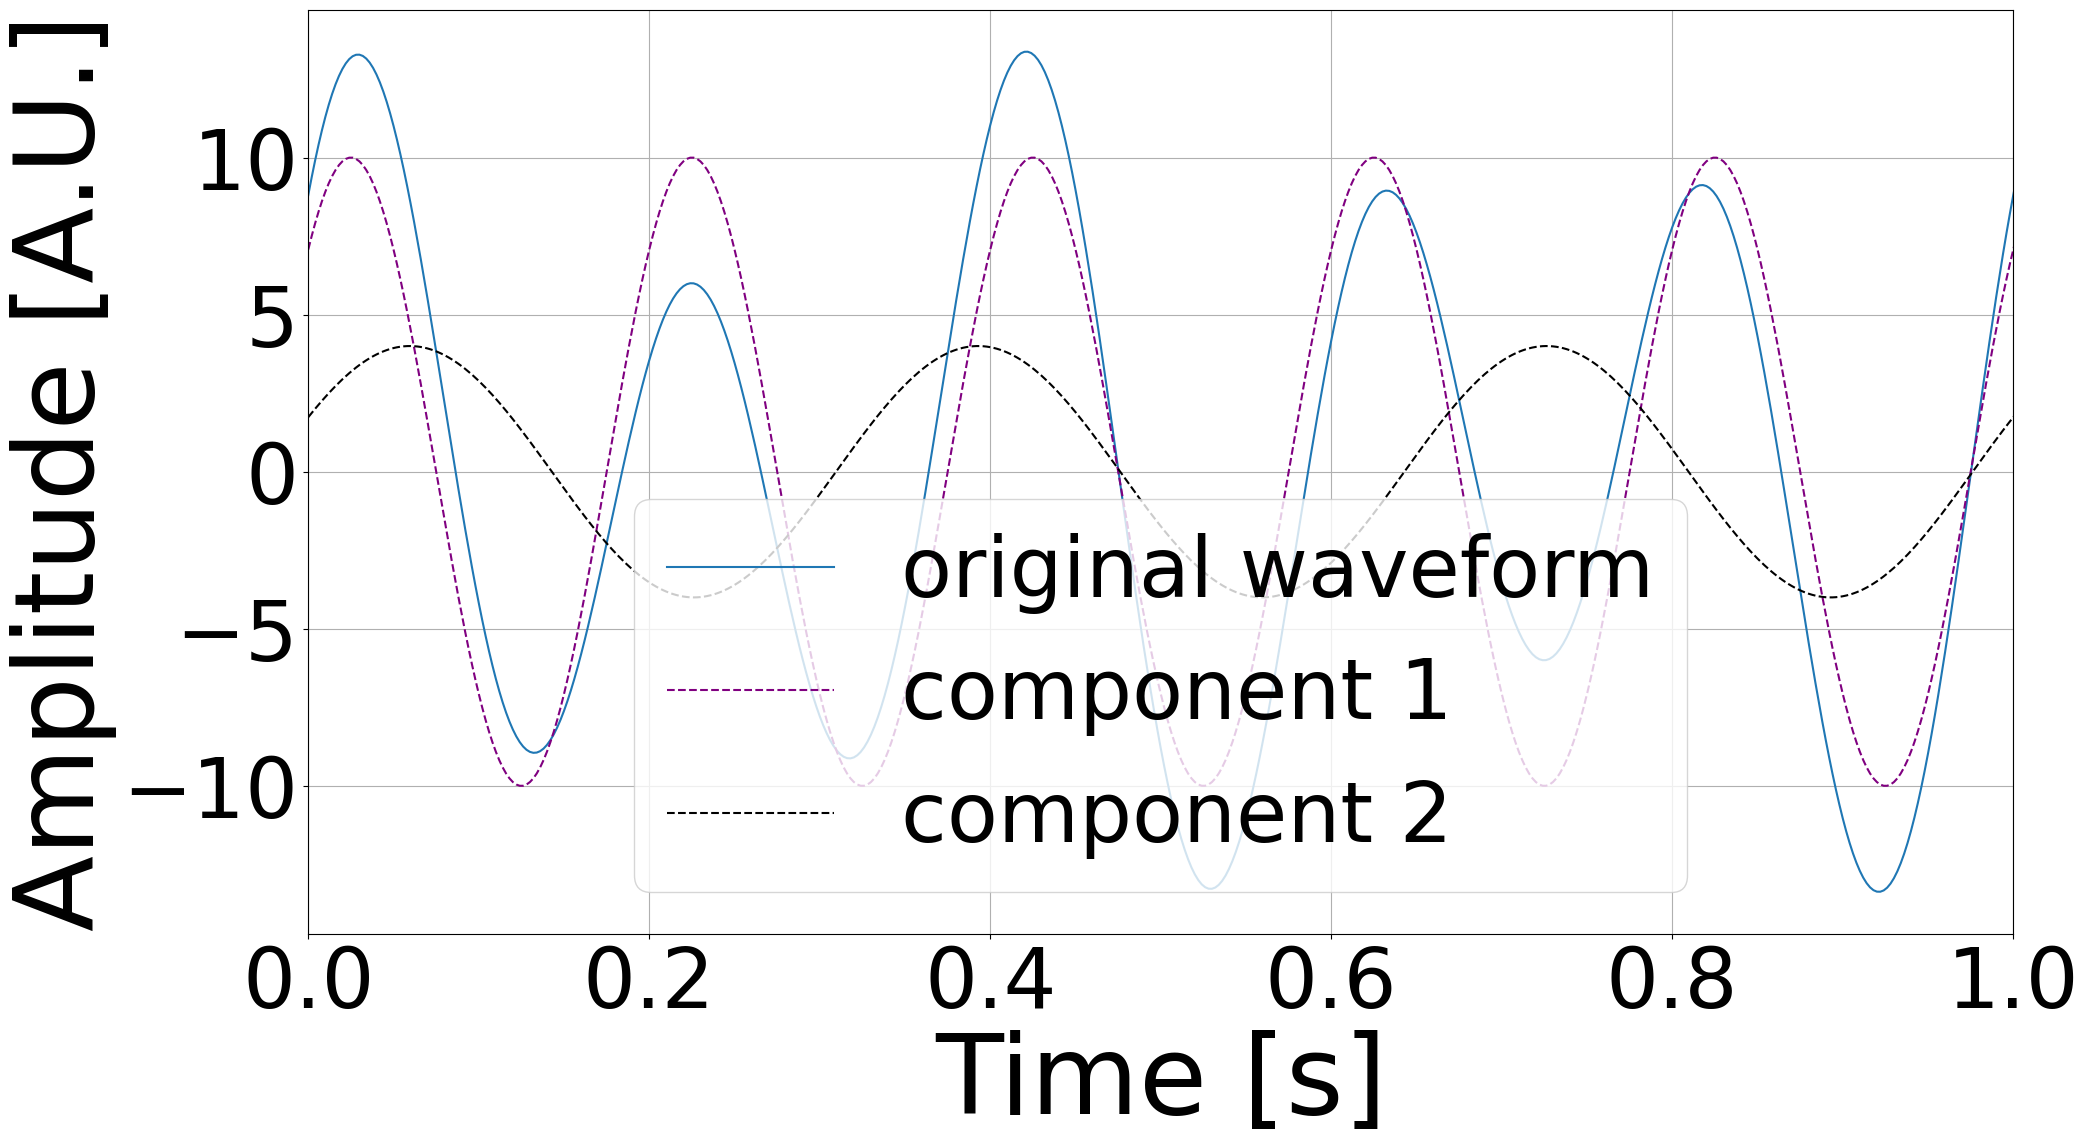

In [7]:
plt.figure(figsize = (22, 12))
plt.plot(times, amplitudes, label = 'original waveform')
plt.plot(times, amplitudes1, label = 'component 1', color = 'purple', linestyle = '--')
plt.plot(times, amplitudes2, label = 'component 2', color = 'black', linestyle = '--')
plt.title('', fontsize = 80)
plt.xlabel('Time [s]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Amplitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.xlim(0, 1)
plt.legend(loc = 'best', fontsize = 60)
plt.grid(True)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("../Results/simple_input/method1_original_wf.pdf", format = "pdf", bbox_inches="tight")
plt.show()

## FFT

In [8]:
freqs = fft.fftfreq(N, 1/f_s)
print(f"last freq: {freqs[-1]}") #this should be the half of f_s.
print(f"len(freqs): {len(freqs)}")
print(freqs)

last freq: -0.1
len(freqs): 5000
[ 0.   0.1  0.2 ... -0.3 -0.2 -0.1]


In [9]:
magnitudes = fft.fft(amplitudes) #when i'm filtering, i'm filtering something complex
n = np.max(np.abs(magnitudes))

phases = np.angle(magnitudes)

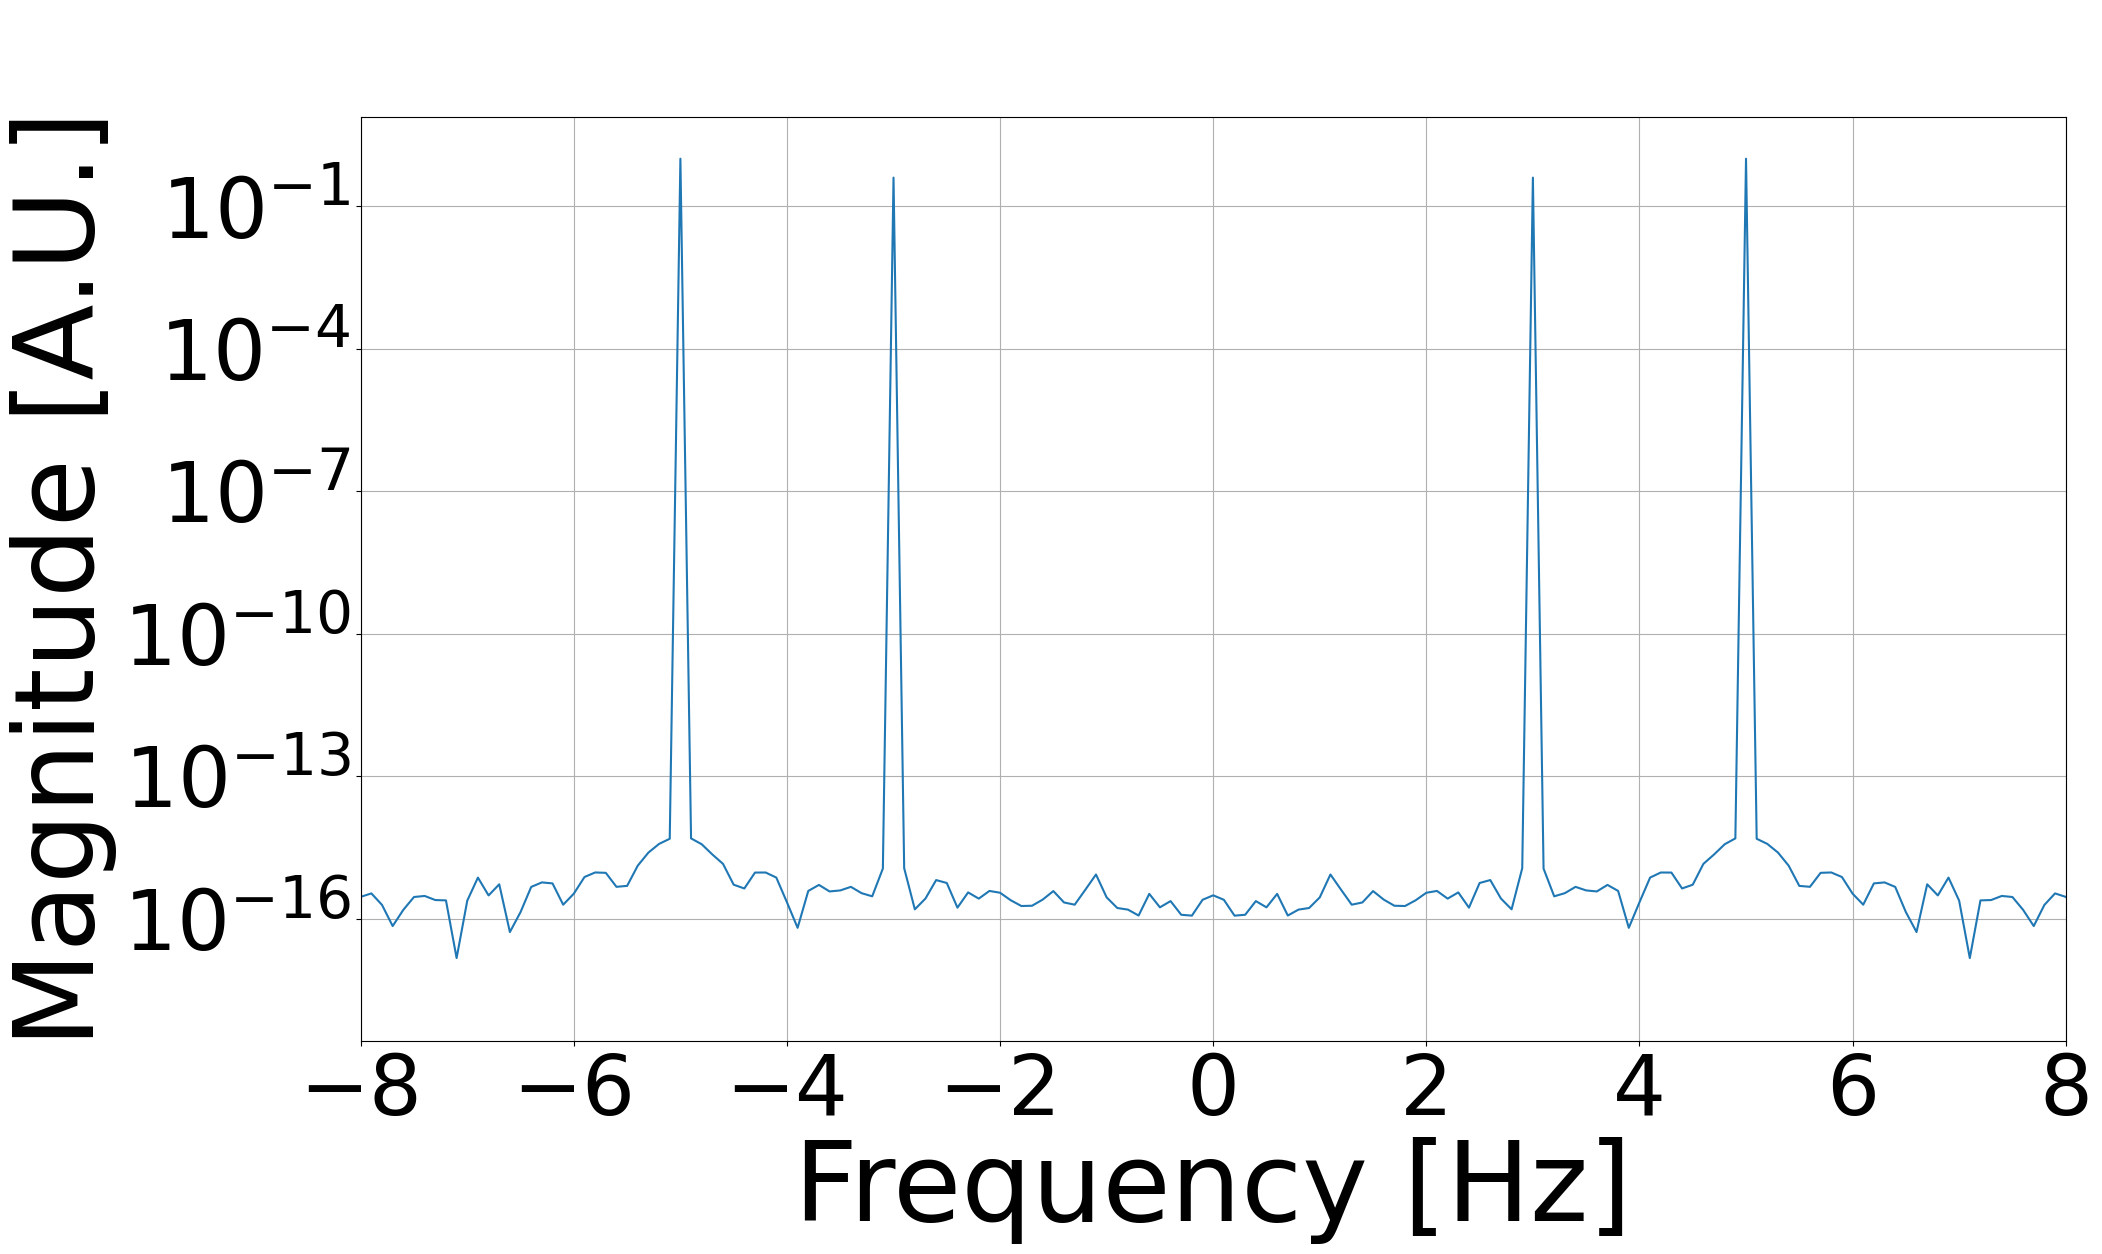

In [34]:
freqs_shifted = fft.fftshift(freqs)
magnitudes_shifted = fft.fftshift(magnitudes)

plt.figure(figsize=(22, 12))
plt.plot(freqs_shifted, np.abs(magnitudes_shifted)/n)
plt.title(' ', fontsize = 80)
plt.xlabel('Frequency [Hz]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Magnitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
#plt.xlim(- f_s / 2, f_s / 2) #freq of time sampling
plt.semilogy()
plt.xlim(- 8, 8)
plt.grid(True)

#plt.savefig("Results/simple_fft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [11]:
if (N%2 == 0):
    pos_freqs = freqs[:round((N/2))]
    pos_magnitudes = magnitudes[:round((N/2))]
    pos_phases = phases[:round((N/2))]
else:
    pos_freqs = freqs[:round((N-1)/2 + 1)]
    pos_magnitudes = magnitudes[:round((N-1)/2 + 1)]
    pos_phases = phases[:round((N-1)/2 + 1)]

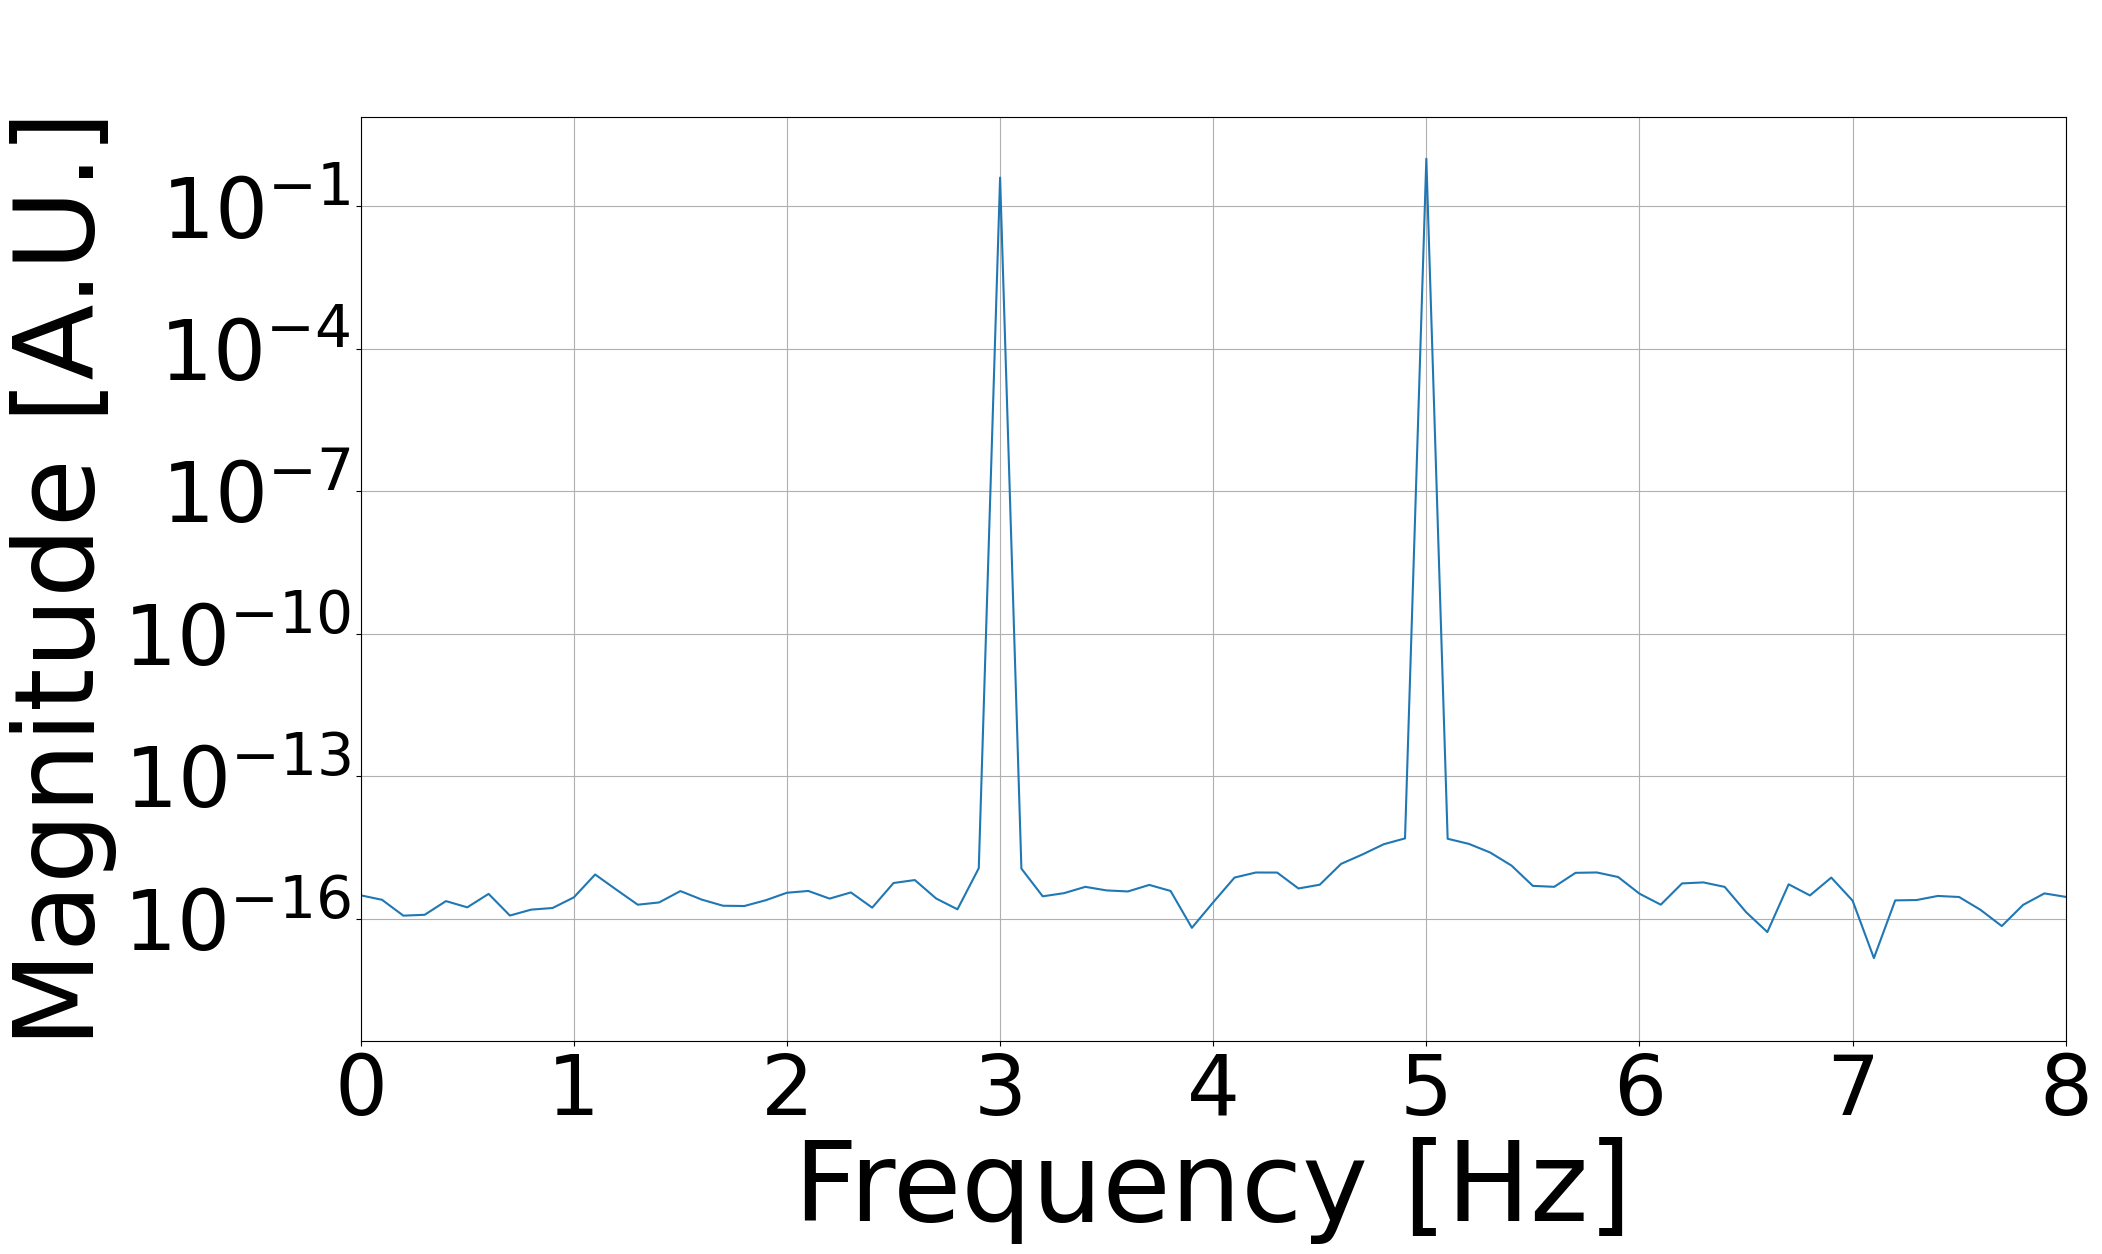

In [12]:
plt.figure(figsize=(22, 12))
plt.plot(pos_freqs, np.abs(pos_magnitudes)/n)

plt.title(' ', fontsize = 80)
plt.xlabel('Frequency [Hz]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Magnitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
#plt.xlim(0, f_s / 2) #f_s = freq of time sampling
plt.semilogy()
plt.xlim(0, 8)
plt.grid(True)


#plt.savefig("Results/simple_fft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()


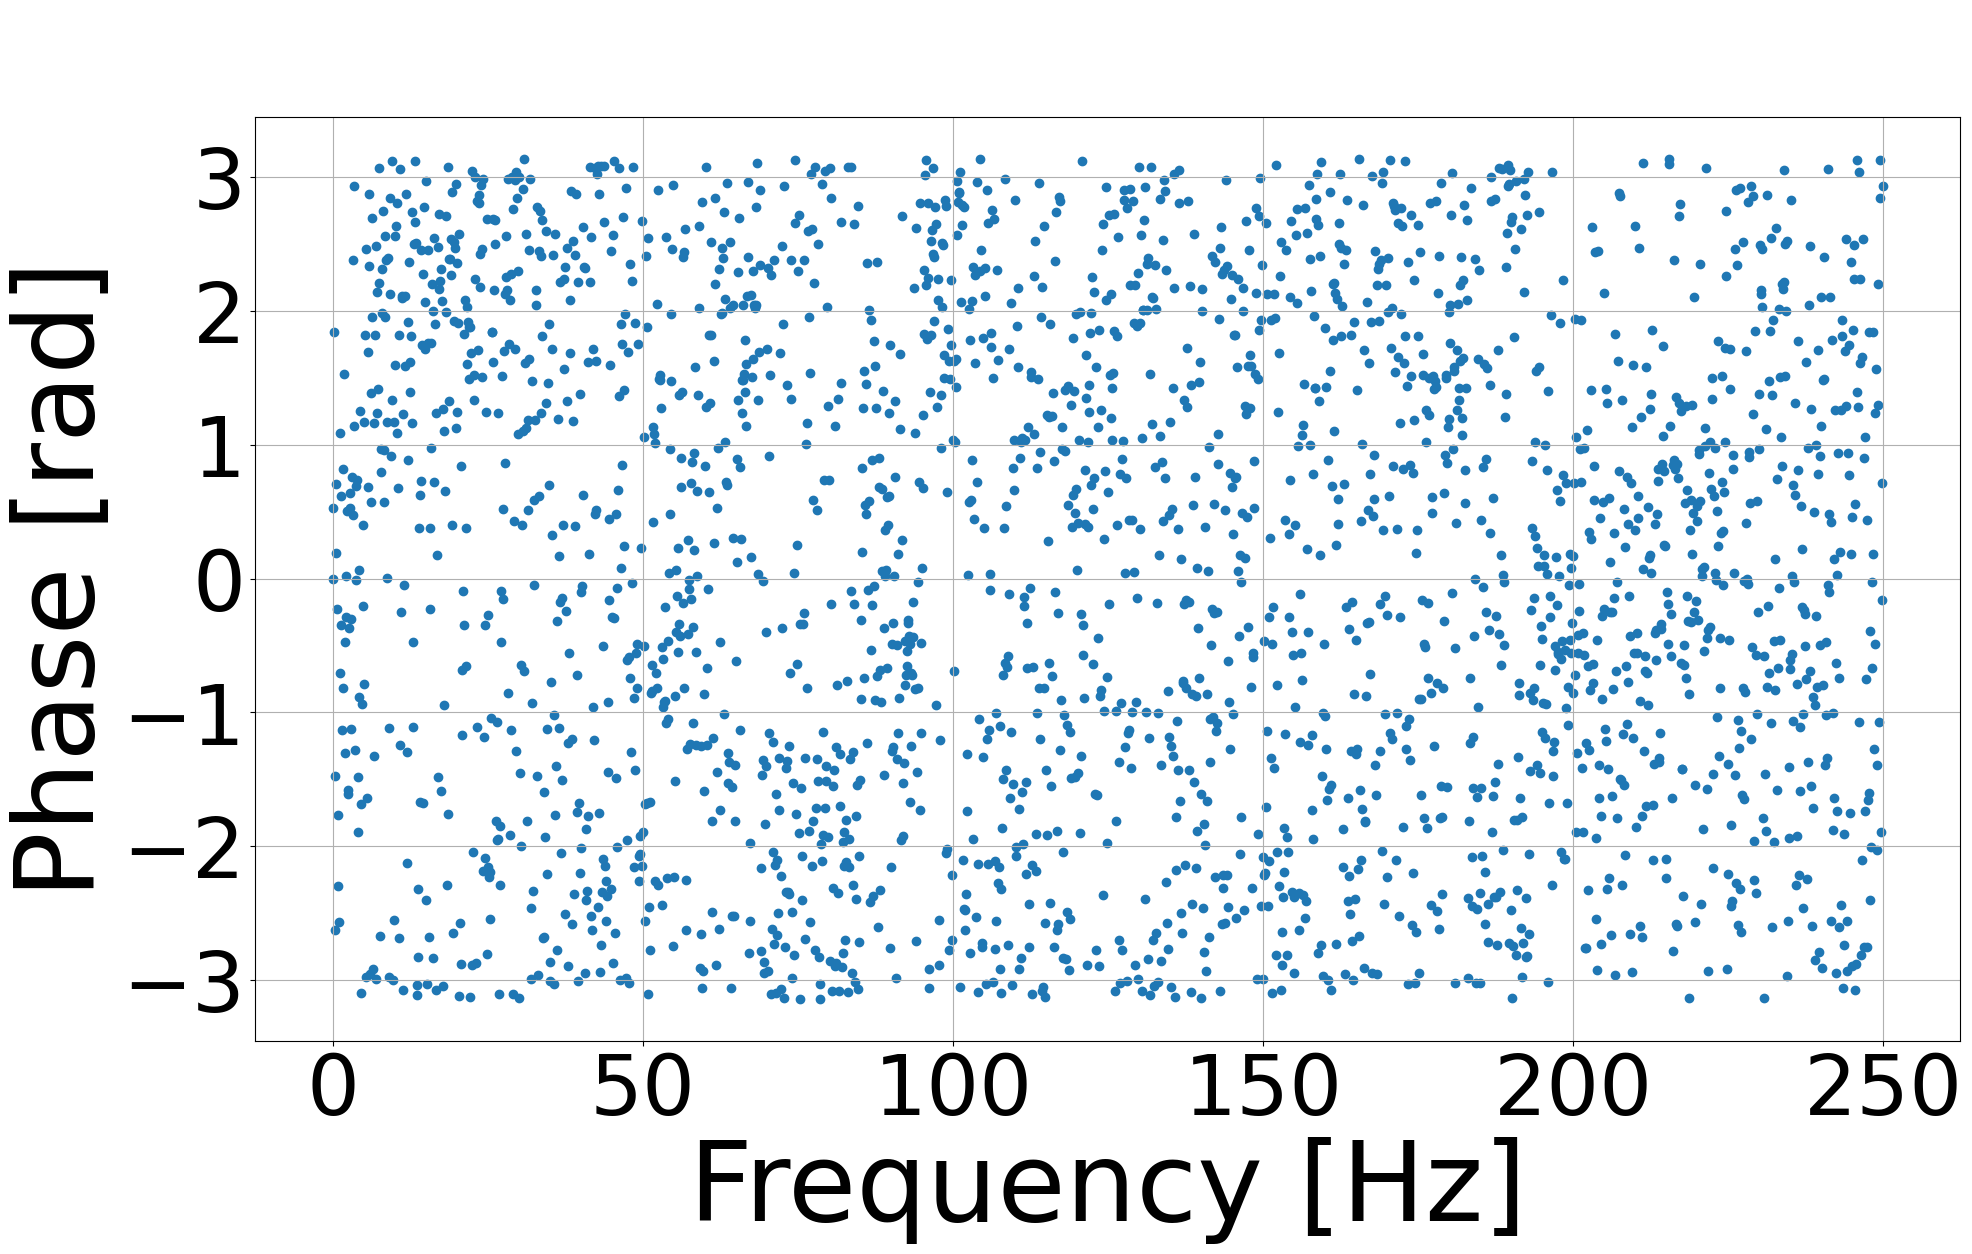

In [36]:
plt.figure(figsize=(22, 12))
plt.scatter(pos_freqs, pos_phases)

plt.title(' ', fontsize = 80)
plt.xlabel('Frequency [Hz]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Phase [rad]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.grid(True)

#plt.savefig("250724_17.23/fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [14]:
f1 = 2
f2 = 4

In [15]:
print(f"positive peak frequency: {pos_freqs[(pos_freqs >= f1) & (pos_freqs <= f2)][np.argmax(pos_magnitudes[(pos_freqs <= f2) & (pos_freqs >= f1)])]} Hz")
print(f"positive peak phase: {pos_phases[(pos_freqs >= f1) & (pos_freqs <= f2)][np.argmax(pos_magnitudes[(pos_freqs <= f2) & (pos_freqs >= f1)])]*180/np.pi} deg")

positive peak frequency: 3.0 Hz
positive peak phase: -64.28571428571428 deg


## Filtering

In [16]:
filtered_fft, range_avg, peak_f = filtering_func(freqs, magnitudes, f1, f2) #passing the complete spectrum

peak_f: [ 3. -3.]
range_avg: 4.241613907261443e-16
sum: 2


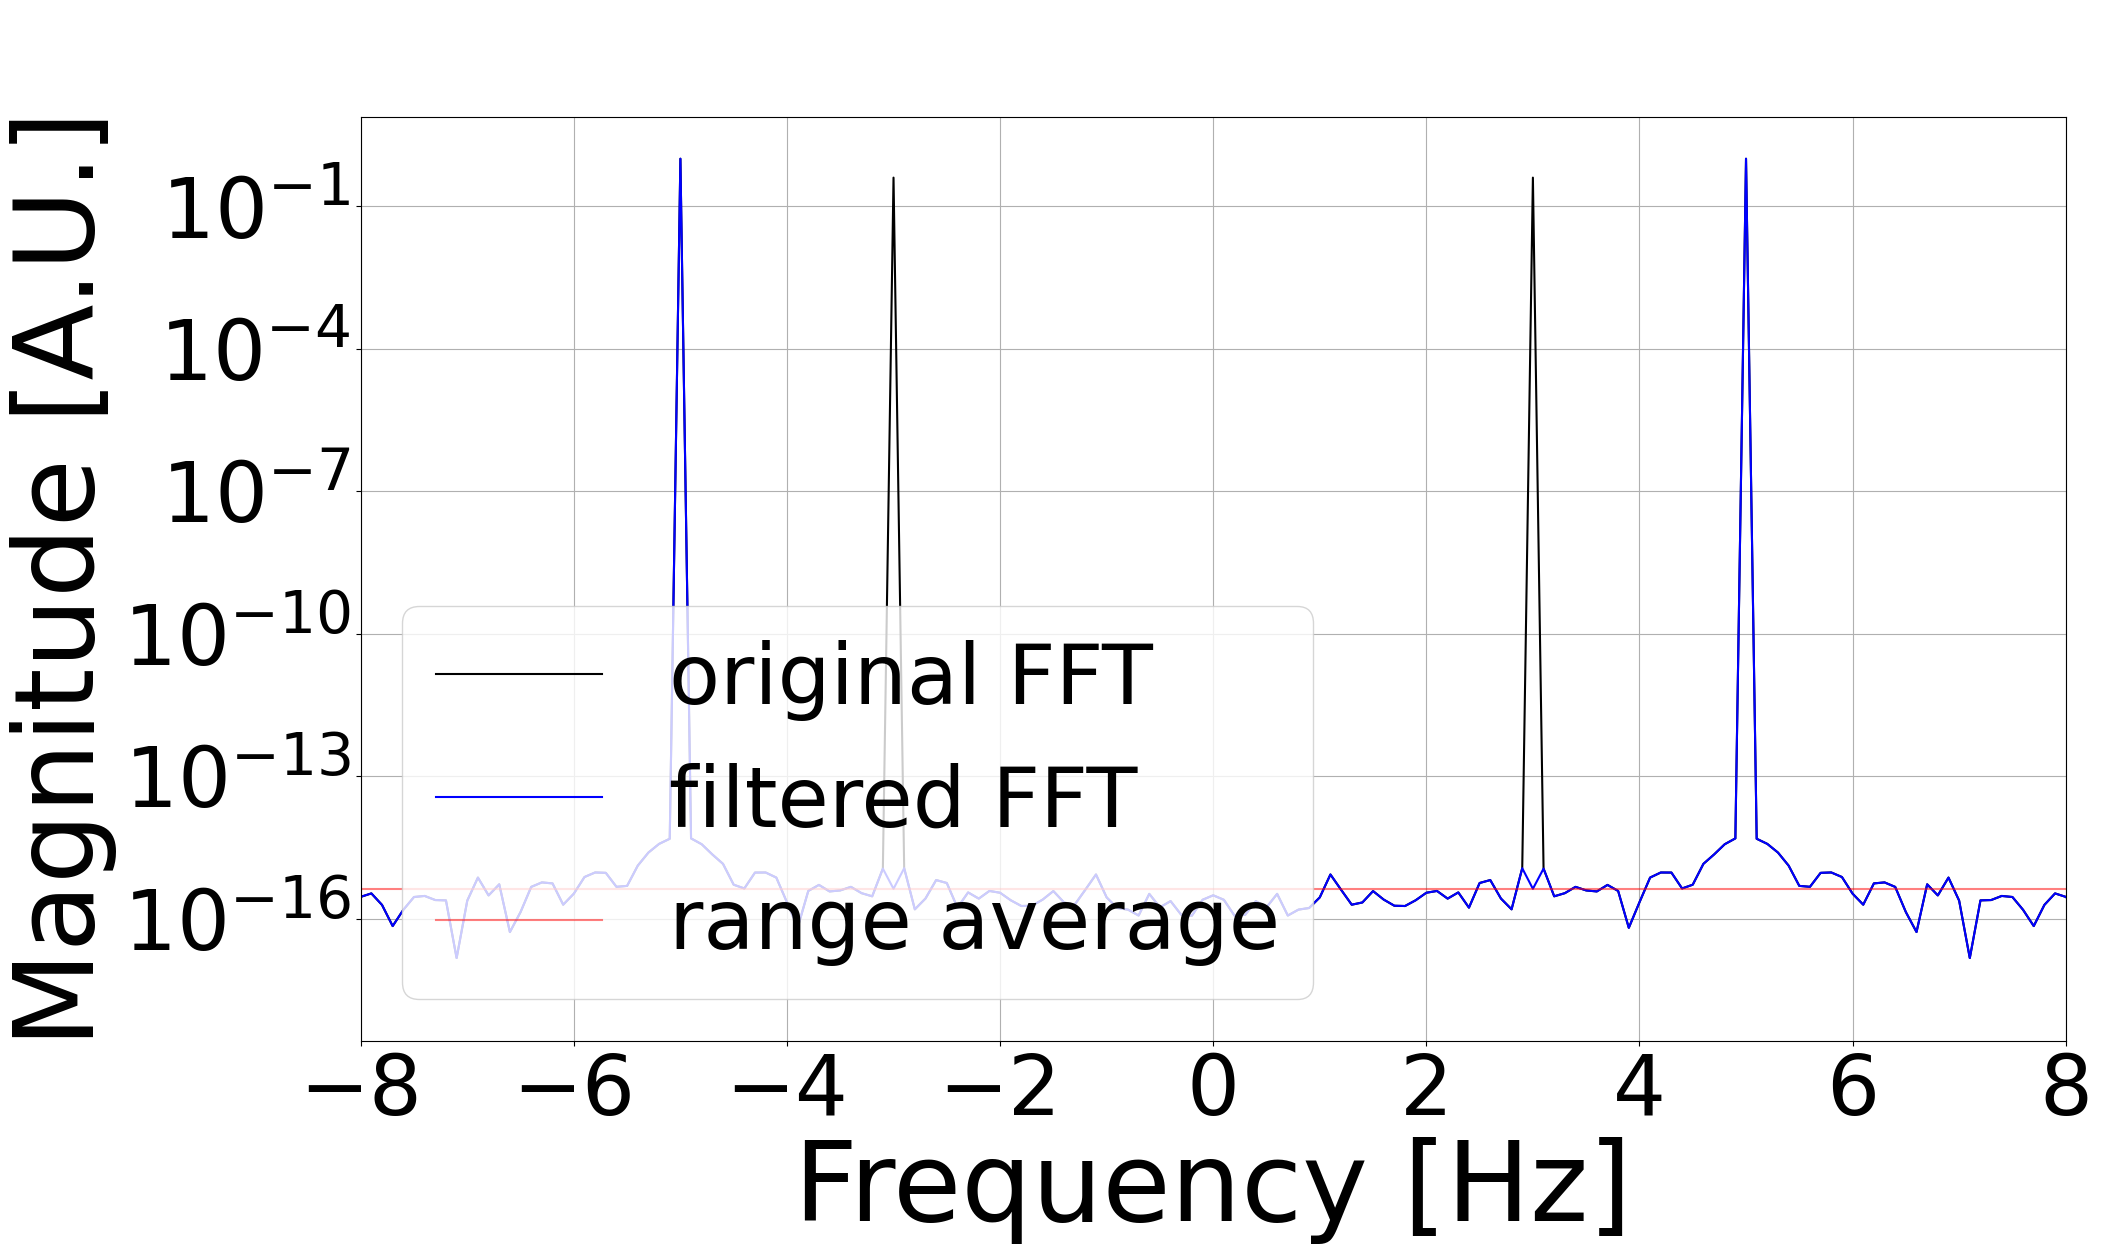

In [17]:
filtered_fft_shifted = fft.fftshift(filtered_fft)

plt.figure(figsize=(22, 12))
plt.plot(freqs_shifted, np.abs(magnitudes_shifted)/n, color = 'k', label = 'original FFT')
plt.plot(freqs_shifted, np.abs(filtered_fft_shifted)/n, color = 'blue', label = 'filtered FFT')
plt.axhline(range_avg, color = 'red', alpha = 0.5, label = 'range average')

plt.title(' ', fontsize = 80)
plt.xlabel('Frequency [Hz]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Magnitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.grid(True)
plt.xlim(-f2*2, f2*2)
plt.semilogy()
plt.legend(loc = 'lower left',fontsize = 60)

#plt.savefig("../Results/simple_input/method1_filtered_fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()


In [18]:
if (N%2 == 0):
    pos_filtered_fft = filtered_fft[:round((N/2))]
else:
    pos_filtered_fft = filtered_fft[:round((N-1)/2 + 1)]

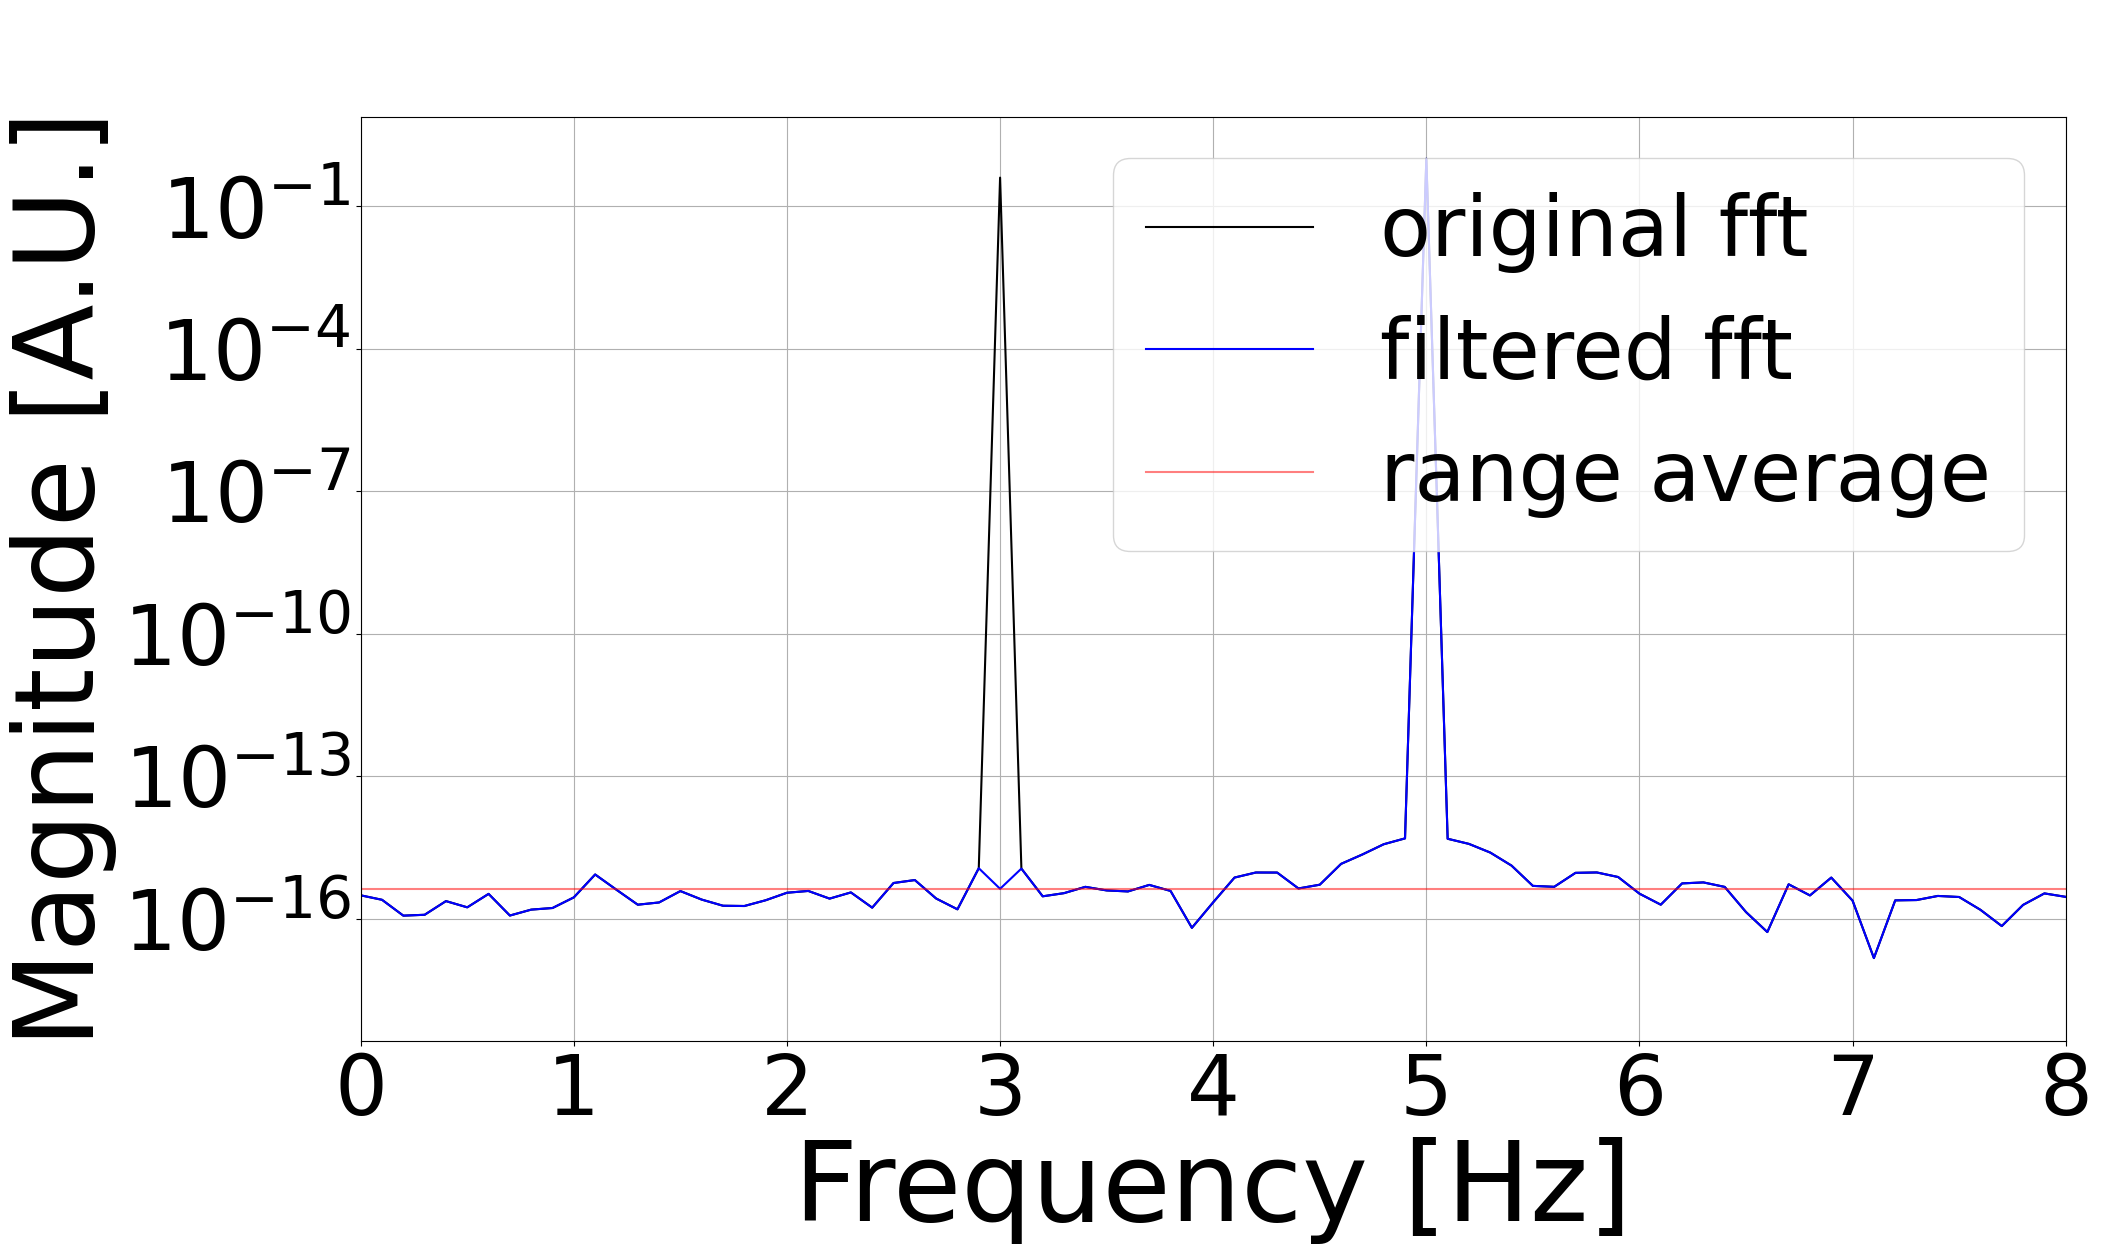

In [19]:
plt.figure(figsize=(22, 12))
plt.plot(pos_freqs, np.abs(pos_magnitudes)/n, color = 'k', label = 'original fft')
plt.plot(pos_freqs, np.abs(pos_filtered_fft)/n, color = 'blue', label = 'filtered fft')
plt.axhline(range_avg, color = 'red', alpha = 0.5, label = 'range average')

plt.title(' ', fontsize = 80)
plt.xlabel('Frequency [Hz]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Magnitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.grid(True)
plt.xlim(0, f2*2)
plt.semilogy()
plt.legend(loc = 'upper right',fontsize = 60)

#plt.savefig("../Results/simple_input/method1_filtered_fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

# How to get the original amplitudes from IFFT

In [20]:
reconstructed_wf = fft.ifft(magnitudes)

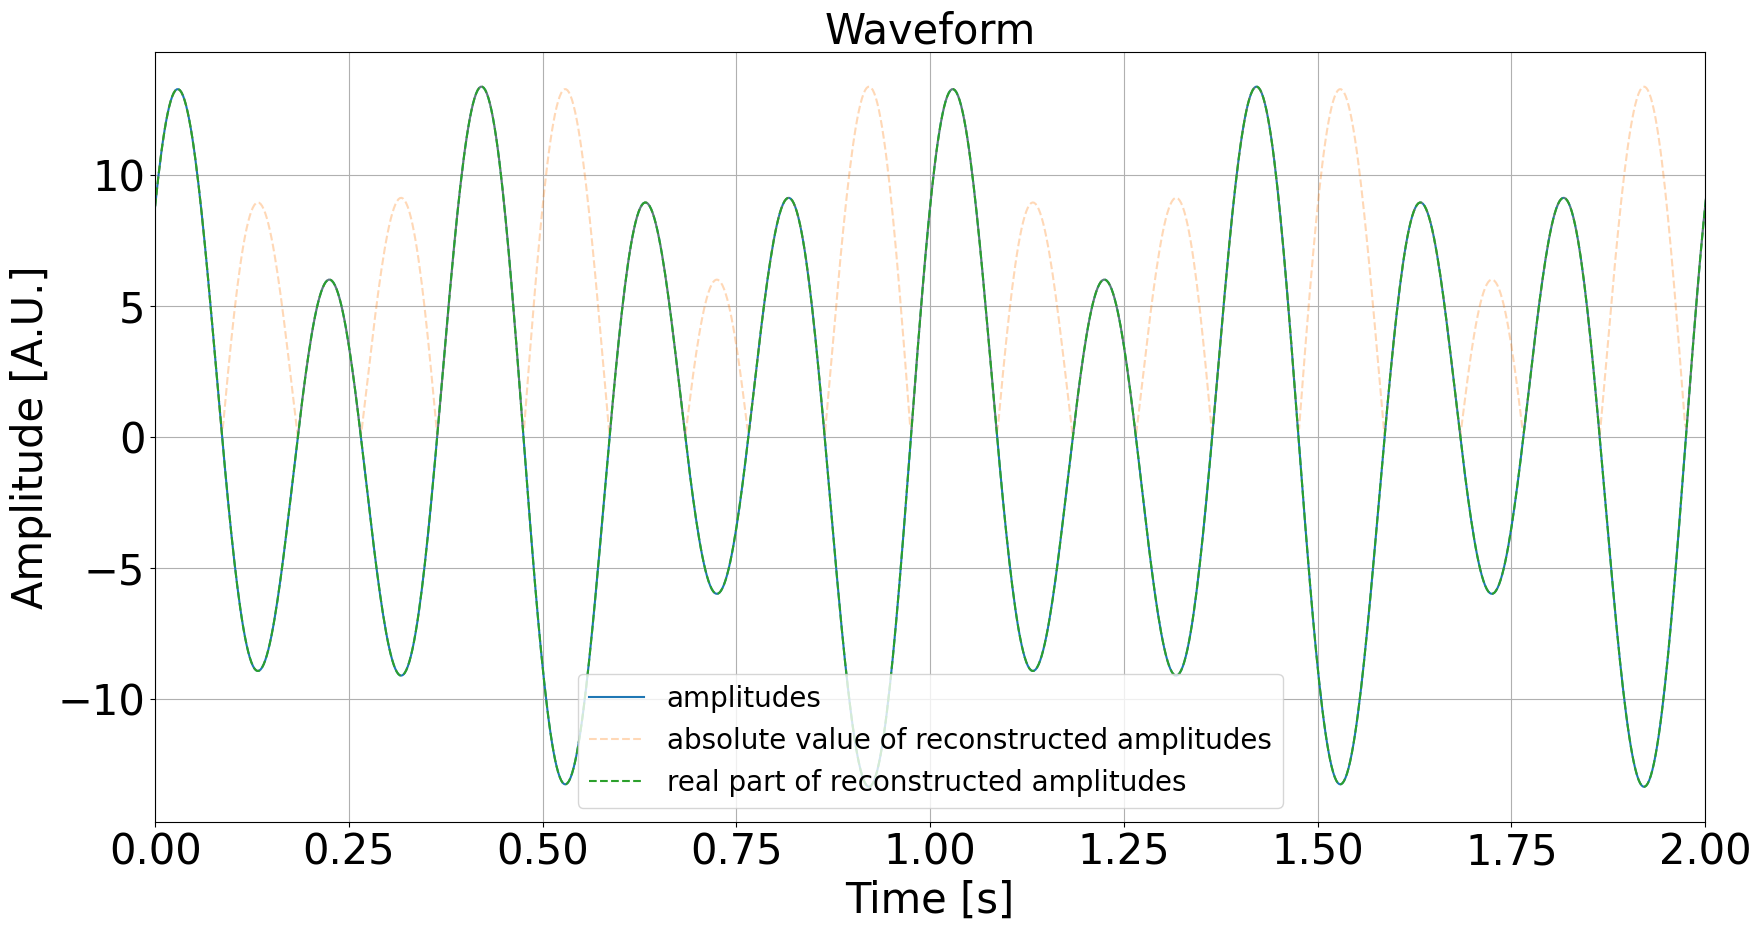

In [21]:
plt.figure(figsize = (20, 10))
plt.plot(times, amplitudes, label = 'amplitudes')
plt.plot(times, np.abs(reconstructed_wf), label = 'absolute value of reconstructed amplitudes', linestyle = '--', alpha = 0.3)
plt.plot(times, reconstructed_wf.real, label = 'real part of reconstructed amplitudes', linestyle = '--')

plt.title('Waveform', fontsize = 30)
plt.xlabel('Time [s]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Amplitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlim(0, 2)
plt.legend(loc = 'best', fontsize = 20)
plt.grid(True)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

## IFFT

In [22]:
#times_ifft = np.arange(N) / f_s #it's right but it's the SAME as times
filtered_wf = fft.ifft(filtered_fft) #complex numbers, whole spectrum IF i put real or abs() here i break the phase info!!

## Compare to original waveform

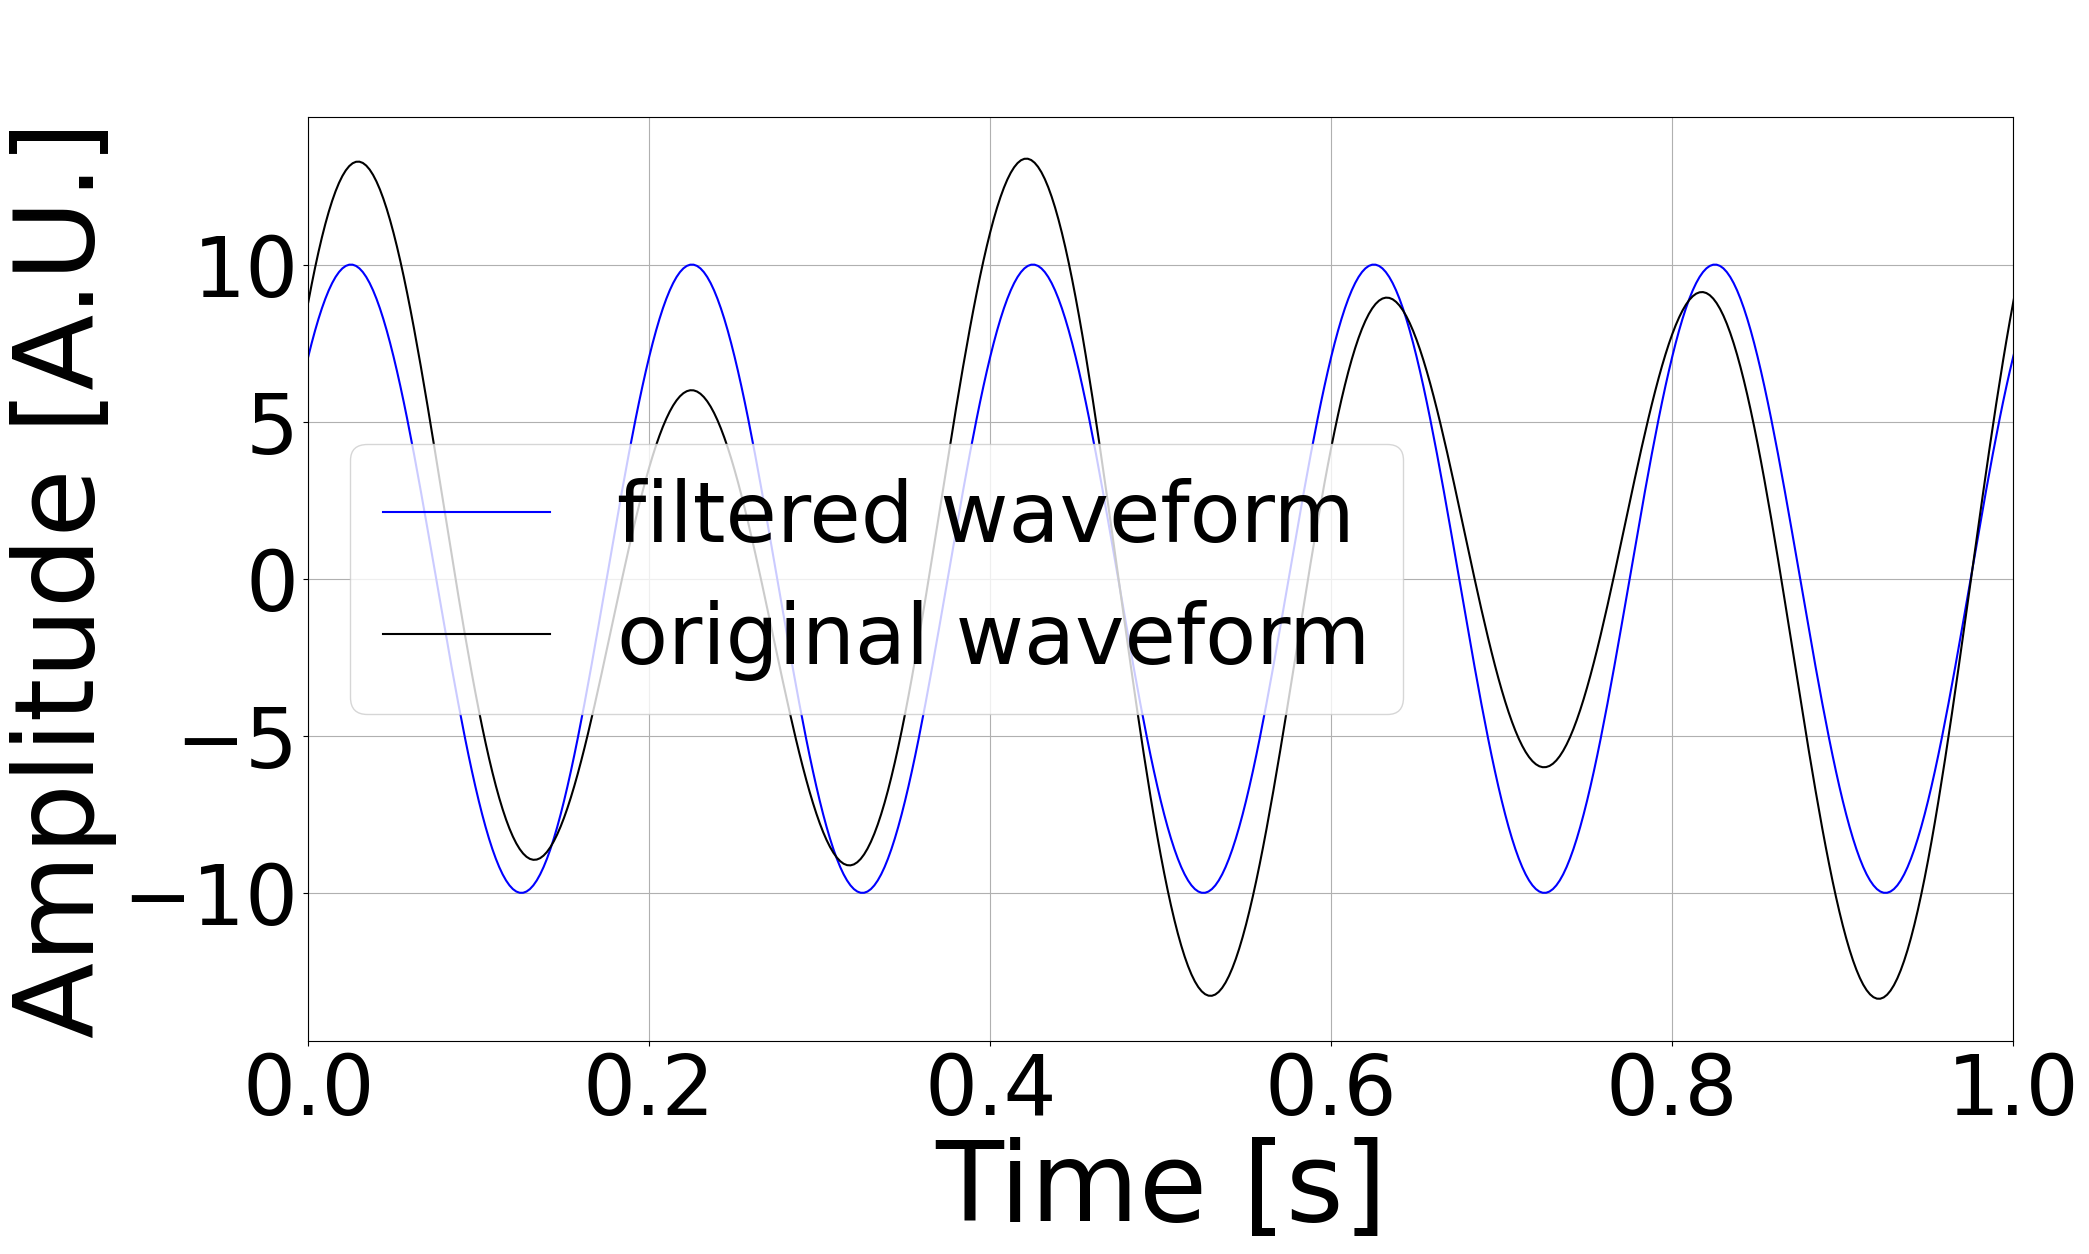

In [23]:
plt.figure(figsize = (22, 12))
plt.plot(times, filtered_wf.real, label = 'filtered waveform', color = 'blue')
plt.plot(times, reconstructed_wf.real, label = 'original waveform', color = 'k')

plt.title(' ', fontsize = 80)
plt.xlabel(r'Time [s]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Amplitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.grid(True)
plt.xlim(0, 1)
plt.legend(loc = 'best', fontsize = 60)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("../Results/simple_input/method1_filtered_wf.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [24]:
noise_wf = reconstructed_wf - filtered_wf #both complex numbers arrays

In [25]:
A = max(noise_wf.real)
phi = phases[freqs == peak_f[0]]
f = peak_f[0]
coswave = A*np.cos(f * 2*np.pi*times + phi)

[1.11863021e-05 1.20538439e-05 1.29042566e-05 ... 8.49334106e-06
 9.40478482e-06 1.03028640e-05]


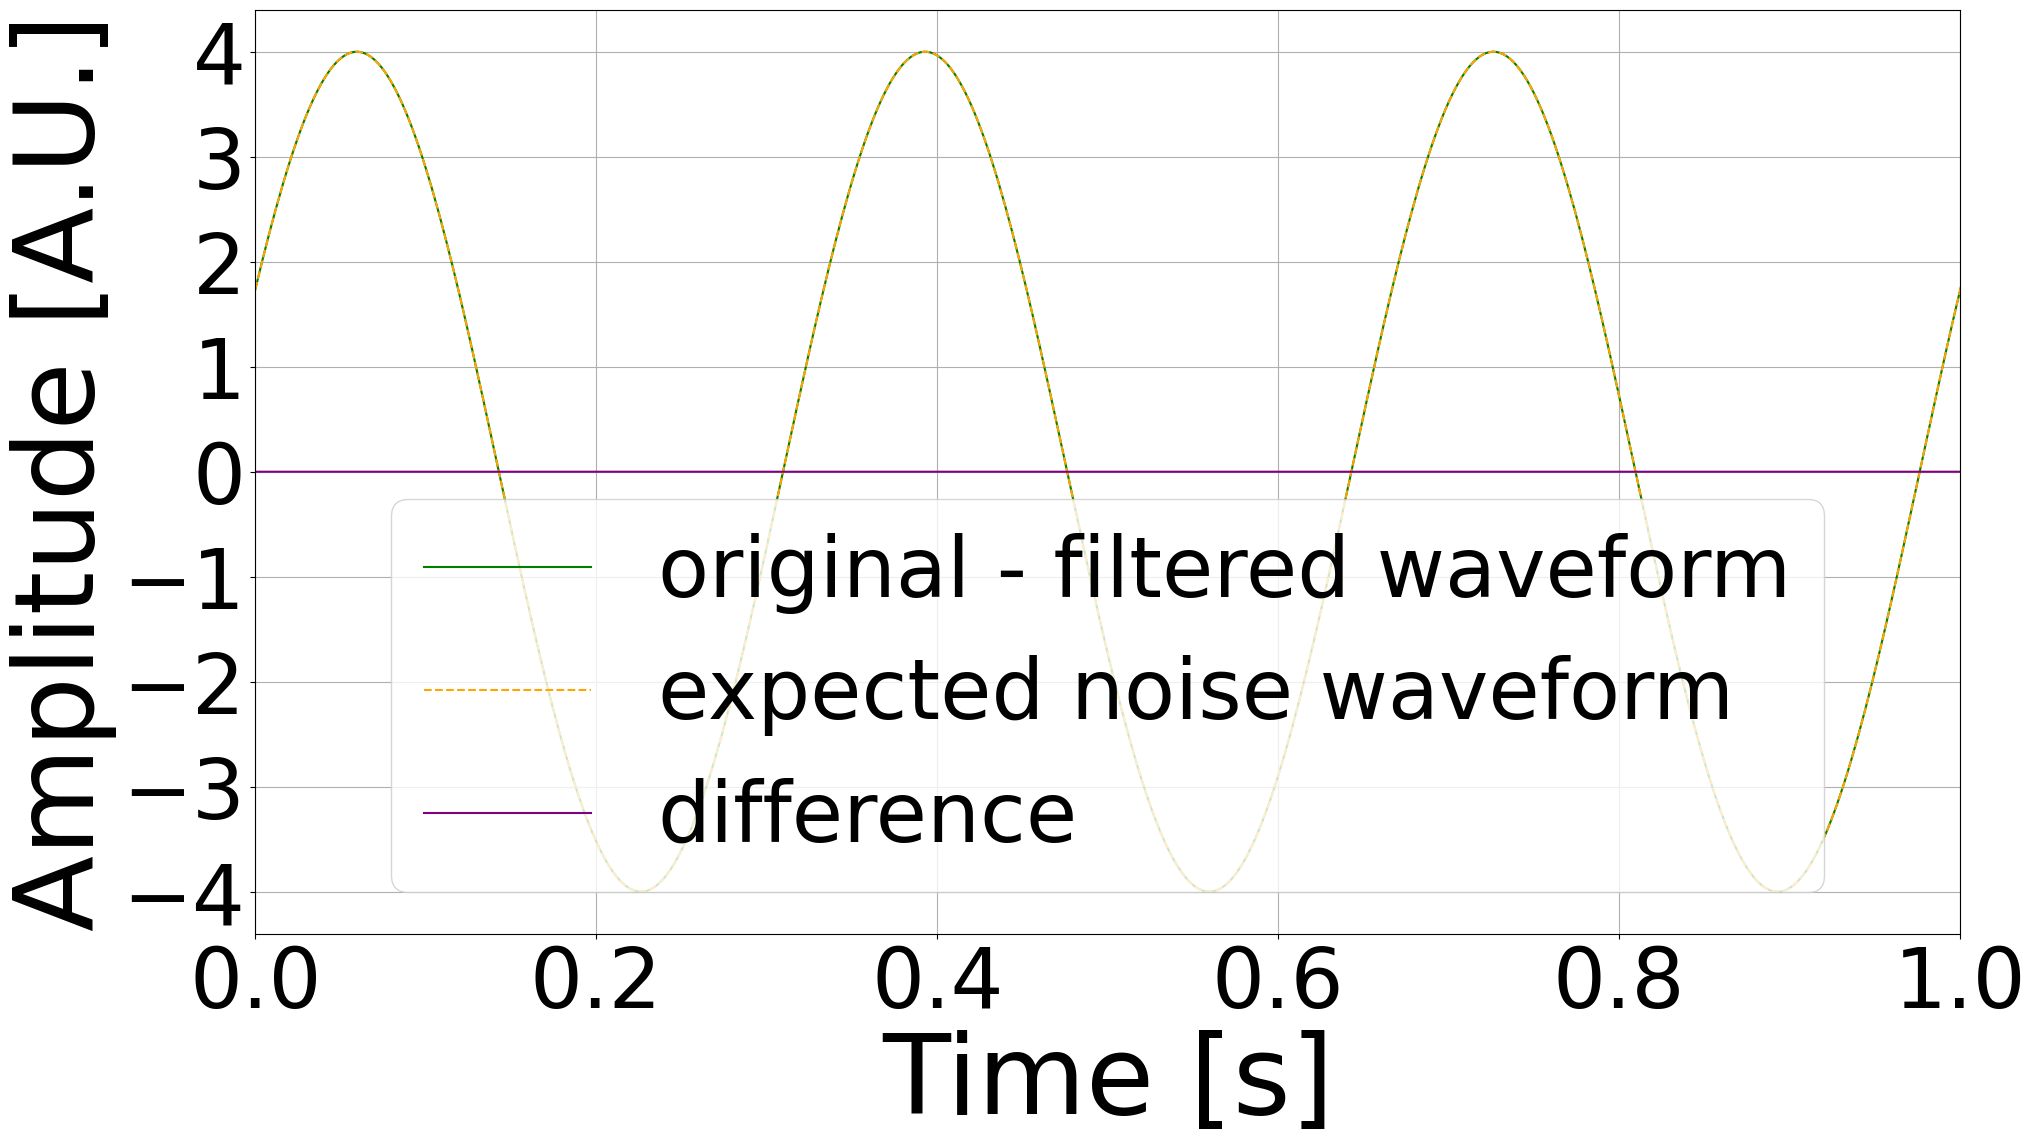

In [26]:
plt.figure(figsize = (22, 12))
plt.plot(times, noise_wf.real, label = 'original - filtered waveform', color = 'green')
plt.plot(times, coswave, label = 'expected noise waveform', color = 'orange', linestyle = '--')
plt.plot(times, noise_wf.real - coswave, label = 'difference', color = 'purple')
print(noise_wf.real - coswave)

plt.title('', fontsize = 80)
plt.xlabel(r'Time [s]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Amplitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.grid(True)
plt.xlim(0, 1)
plt.legend(loc = 'lower center', fontsize = 60)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("../Results/simple_input/method1_cosine_wave.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [27]:
print(np.arccos((noise_wf.real)[times == 0]/A)*180/np.pi)
print(np.arccos((coswave)[times == 0]/A)*180/np.pi)

[64.28553644]
[64.28571429]


# Make sure reconstructed waveform and original waveform are the same

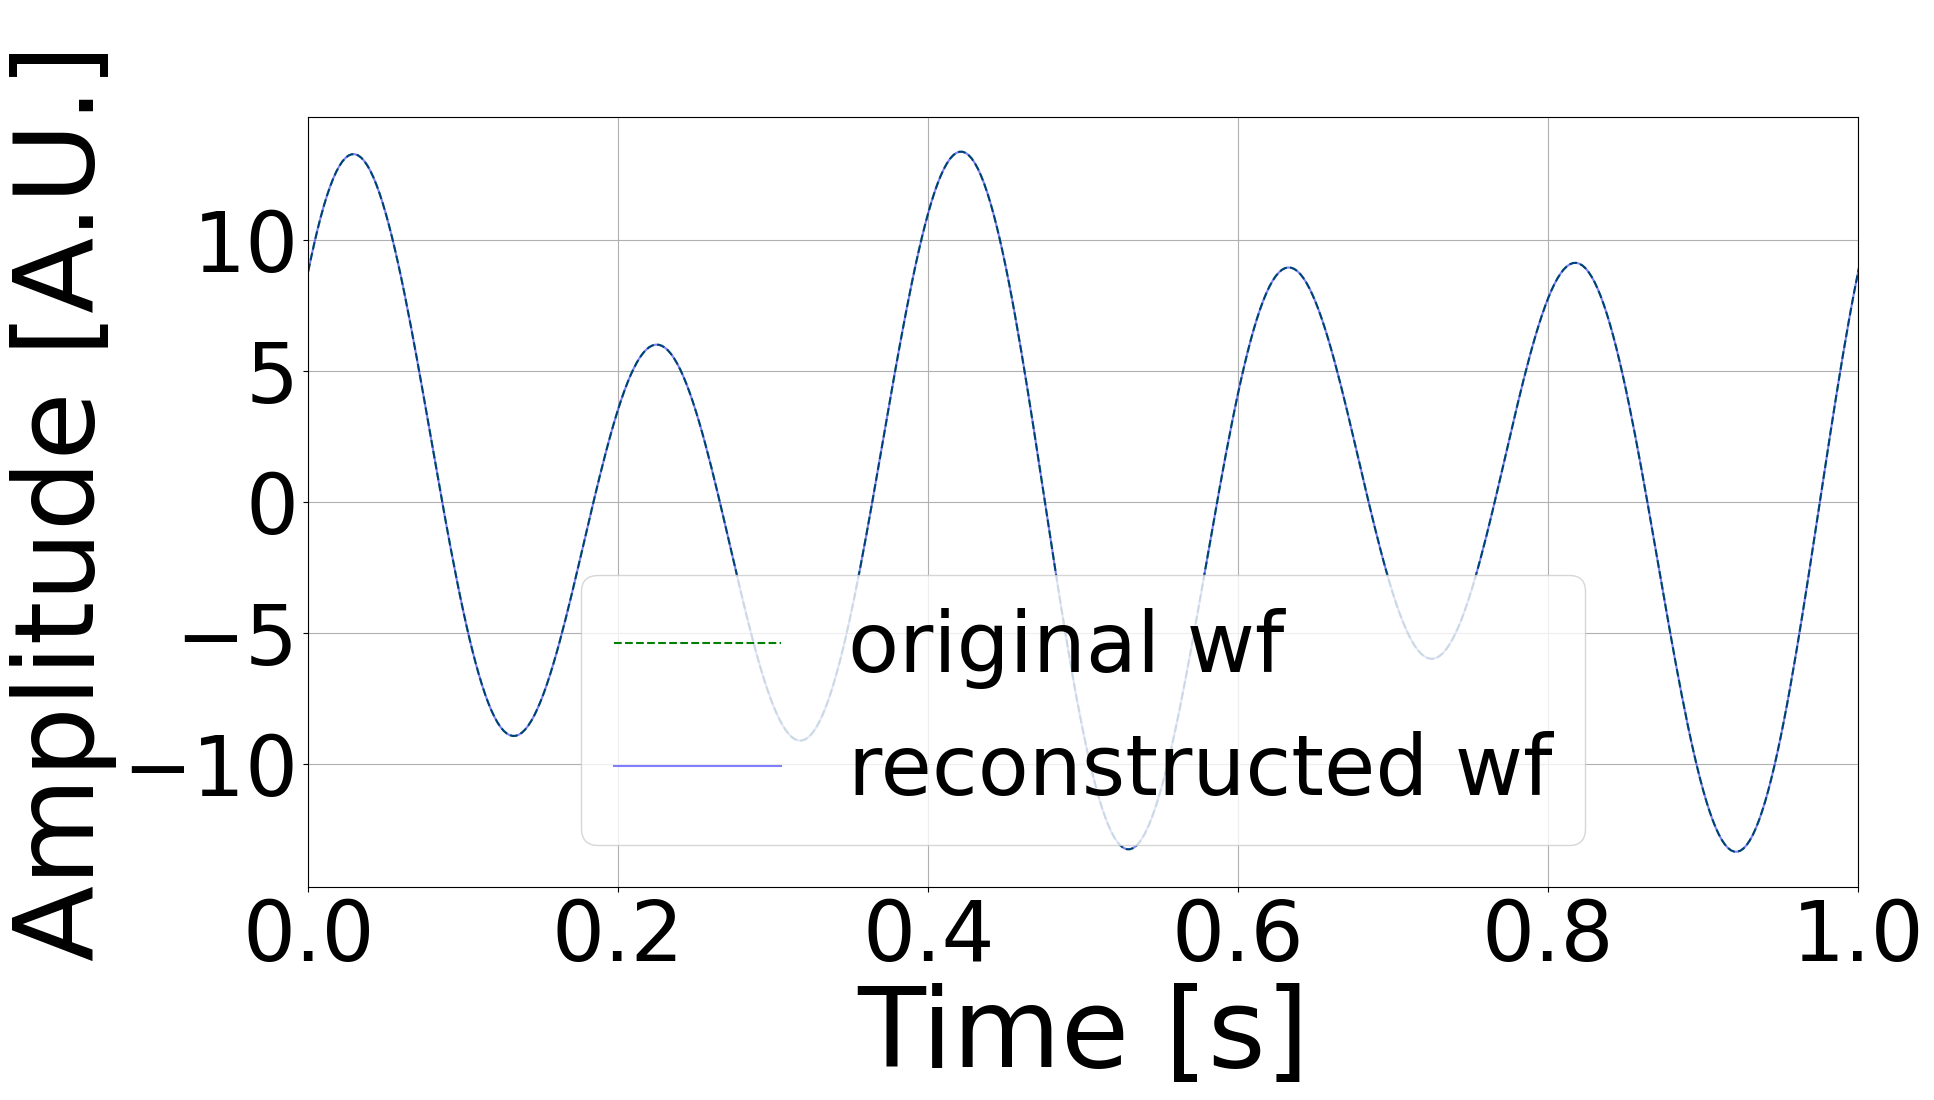

In [28]:
plt.figure(figsize = (20, 10))
plt.plot(times, amplitudes, label = 'original wf', color = 'green', linestyle = '--')
plt.plot(times, reconstructed_wf.real, label = 'reconstructed wf', color = 'blue', alpha = 0.5)

plt.title(' ', fontsize = 80)
plt.xlabel(r'Time [s]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Amplitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.grid(True)
plt.xlim(0, 1)
plt.legend(loc = 'best', fontsize = 60)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

# Plot reconstructed FFT

In [29]:
reconstructed_filtered_fft = fft.fft(filtered_wf)

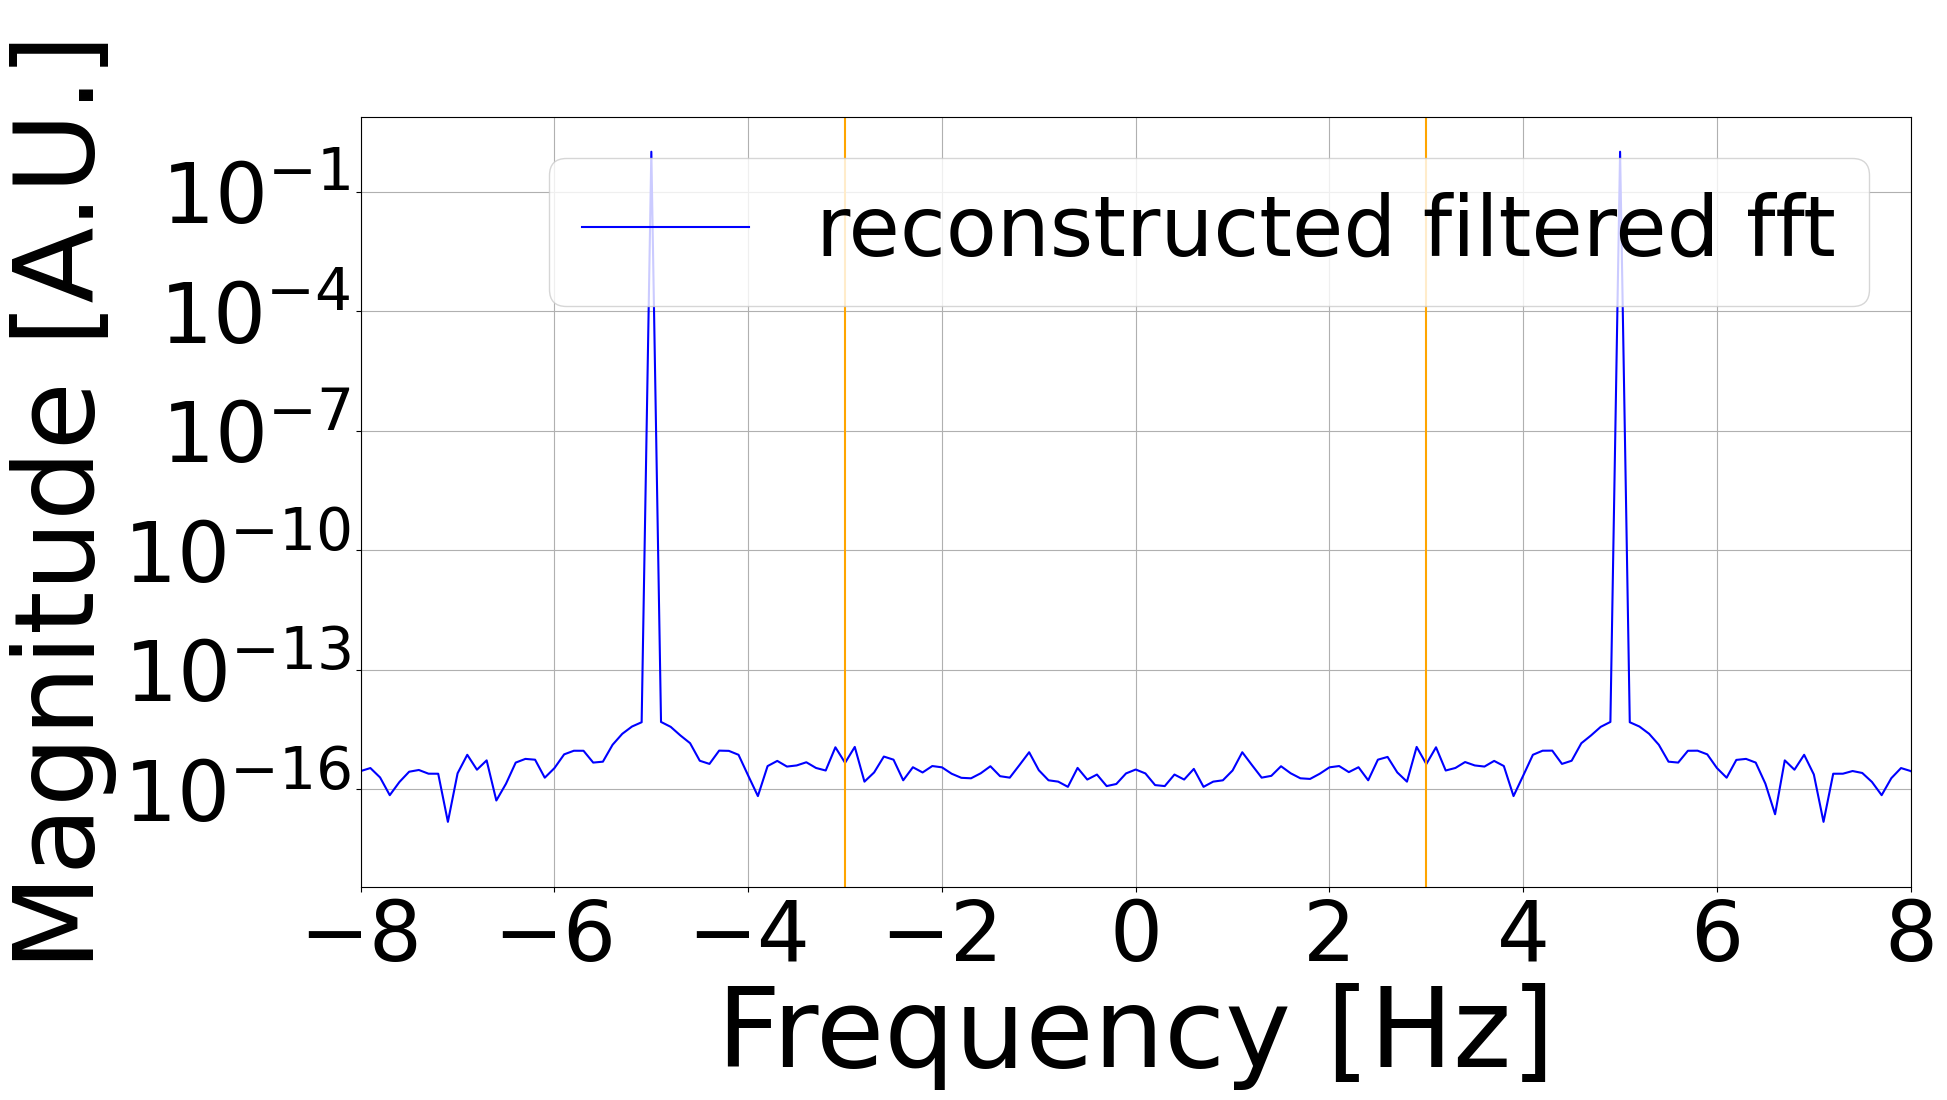

In [30]:
reconstructed_filtered_fft_shifted = fft.fftshift(reconstructed_filtered_fft)

plt.figure(figsize=(20, 10))
plt.plot(freqs_shifted, np.abs(reconstructed_filtered_fft_shifted)/n, color = 'blue', label = 'reconstructed filtered fft')
plt.axvline(peak_f[0], color = 'orange')
plt.axvline(peak_f[1], color = 'orange')

plt.title(' ', fontsize = 80)
plt.xlabel('Frequency [Hz]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Magnitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.grid(True)
plt.xlim(-f2*2, f2*2)
plt.legend(loc = 'best', fontsize = 60)
plt.semilogy()

#plt.savefig("250724_17.23/fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [31]:
if (N%2 == 0):
    pos_reconstructed_filtered_fft = reconstructed_filtered_fft[:round((N/2))]
else:
    pos_reconstructed_filtered_fft = reconstructed_filtered_fft[:round((N-1)/2 + 1)]

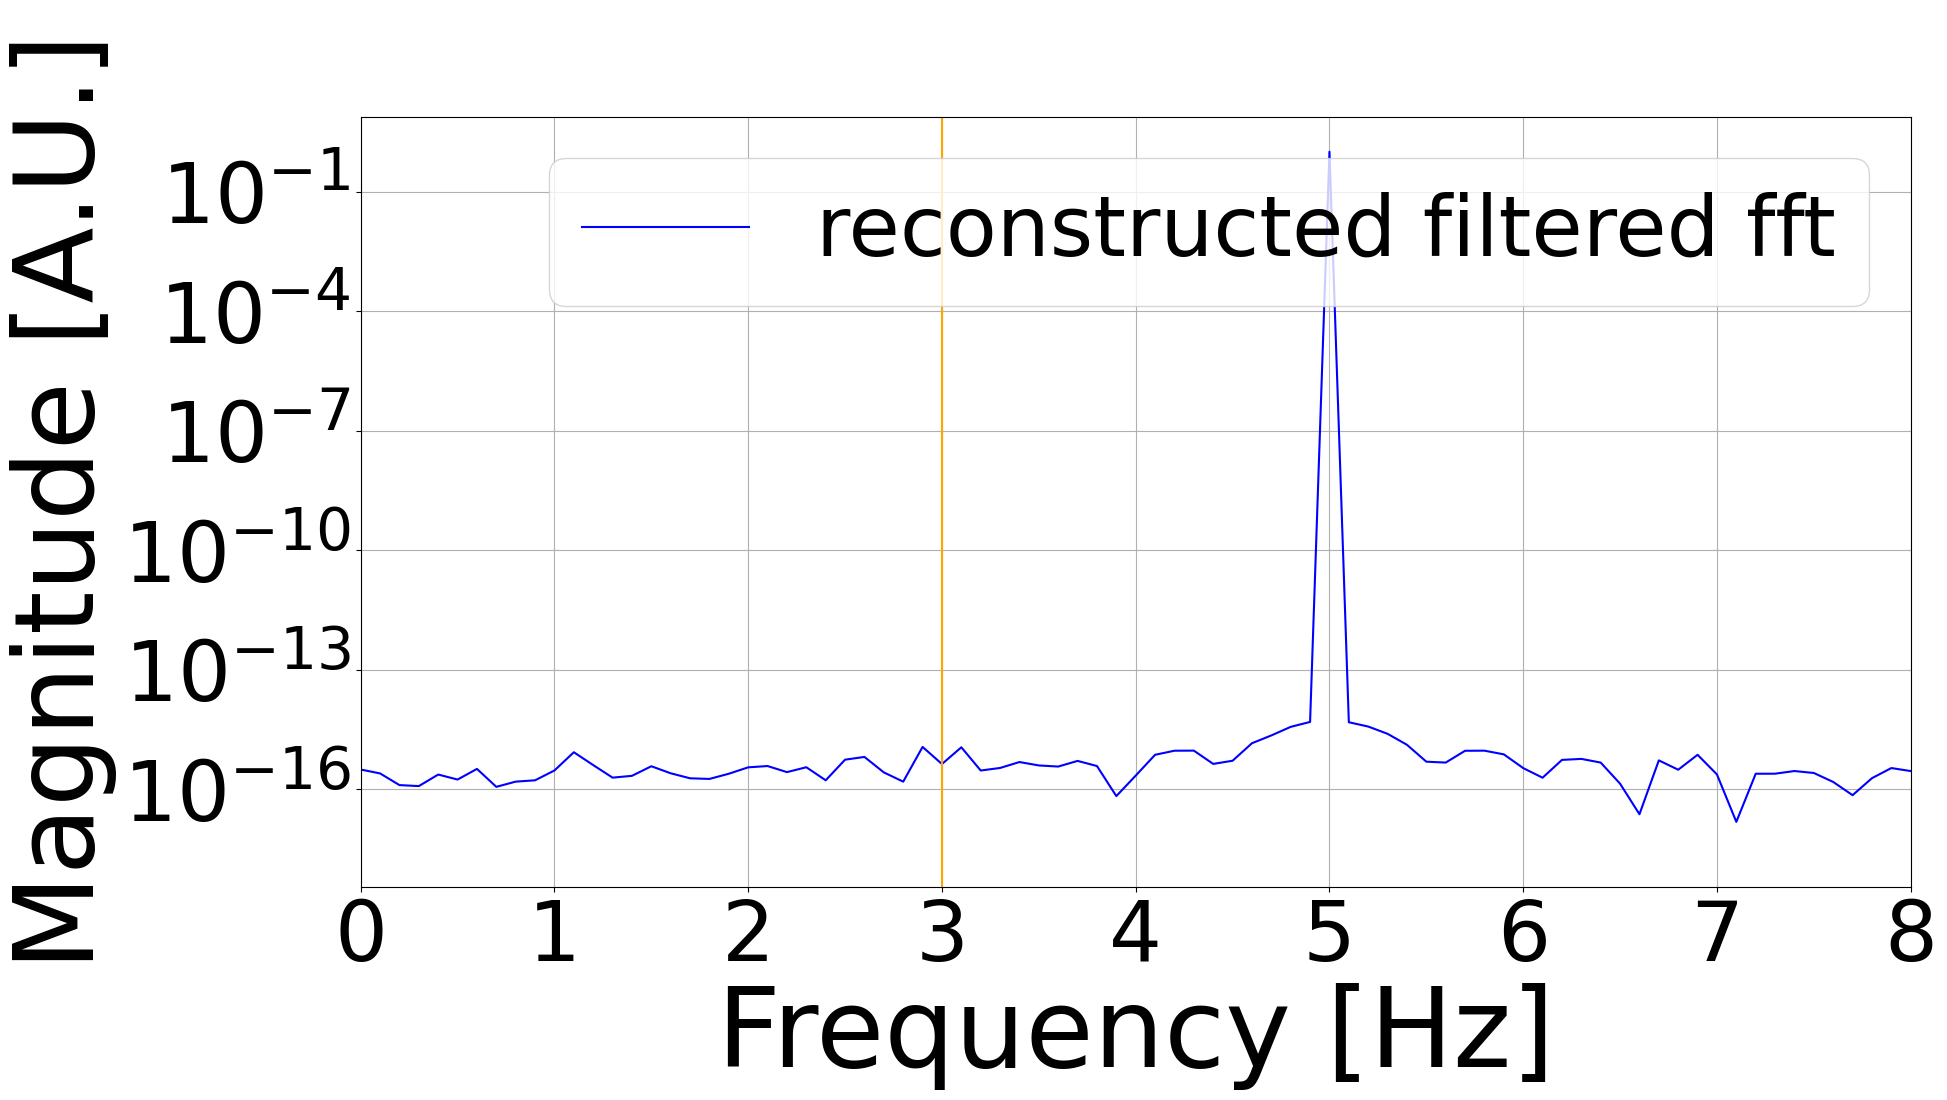

In [32]:
plt.figure(figsize=(22, 12))
plt.plot(pos_freqs, np.abs(pos_reconstructed_filtered_fft)/n, color = 'blue', label = 'reconstructed filtered fft')
plt.axvline(peak_f[0], color = 'orange')

plt.title(' ', fontsize = 80)
plt.xlabel('Frequency [Hz]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Magnitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.grid(True)
plt.xlim(0, f2*2)
plt.legend(loc = 'best', fontsize = 60)
plt.semilogy()

#plt.savefig("250724_17.23/fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()